In [1]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold

from umap import UMAP
from hdbscan import HDBSCAN

c:\users\weldl\miniconda3\envs\i2a2-fm\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\weldl\miniconda3\envs\i2a2-fm\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\users\weldl\miniconda3\envs\i2a2-fm\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Loading the data file:
data = pd.read_excel('../data/readcounts.xlsx')
data

,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,2,0,0,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,980,932,360,450,484,926,803,630,537,582
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,117,286,137,90,105,275,101,56,87,81
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,28,157,34,20,15,139,54,25,21,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65210,ENSG00000281918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65211,ENSG00000281919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65212,ENSG00000281920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65213,ENSG00000281921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transposing the data:
columns = data.loc[:, 'Unnamed: 0'].values
data = data.drop(columns=['Unnamed: 0'])
data = data.transpose()
data.columns = columns
data

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,0,0,0,0,0,0,0,0,0
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,0,0,0,0,0,0,0,0
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,0,0,0,0,0,0,0,0
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,0,0,0,0,0,0,0,0
H227,0,0,491,186,30,11929,14,136,745,730,...,0,0,0,0,0,0,0,0,0,0
H228,0,0,449,148,17,6856,16,227,3770,663,...,0,0,0,0,0,0,0,0,0,0
H229,0,0,466,169,45,6756,15,217,1260,669,...,0,0,0,0,0,0,0,0,0,0
H230,0,0,727,258,100,7668,4,905,1480,883,...,0,0,0,0,0,0,0,0,0,0
H231,1,0,774,145,33,9315,1,94,75,873,...,0,0,0,0,0,0,0,0,0,0
H232,0,0,576,131,8,3319,7,88,288,678,...,0,0,0,0,0,0,0,0,0,0


# Preprocessing:

In [4]:
X_array = data.loc[:, data.columns].values
X_array.shape

(48, 65215)

In [5]:
# Feature seletion:
sel = VarianceThreshold(threshold=0)
X_array_sel = sel.fit_transform(X_array)
X_array_sel.shape

(48, 44678)

In [6]:
# Normalizing data:
x_array_norm = MinMaxScaler().fit_transform(X_array_sel)
# pd.DataFrame(x_array_norm)

In [7]:
# Standardizing data:
x_array_std = StandardScaler().fit_transform(X_array_sel)
# pd.DataFrame(x_array_std)

In [8]:
# x_array_prep = X_array_sel
# x_array_prep = x_array_norm
x_array_prep = x_array_std

n_components = 30

# Embeddings:

In [9]:
methods = OrderedDict()
methods['PCA'] = PCA(n_components=n_components)

0 PCA PCA(n_components=30)


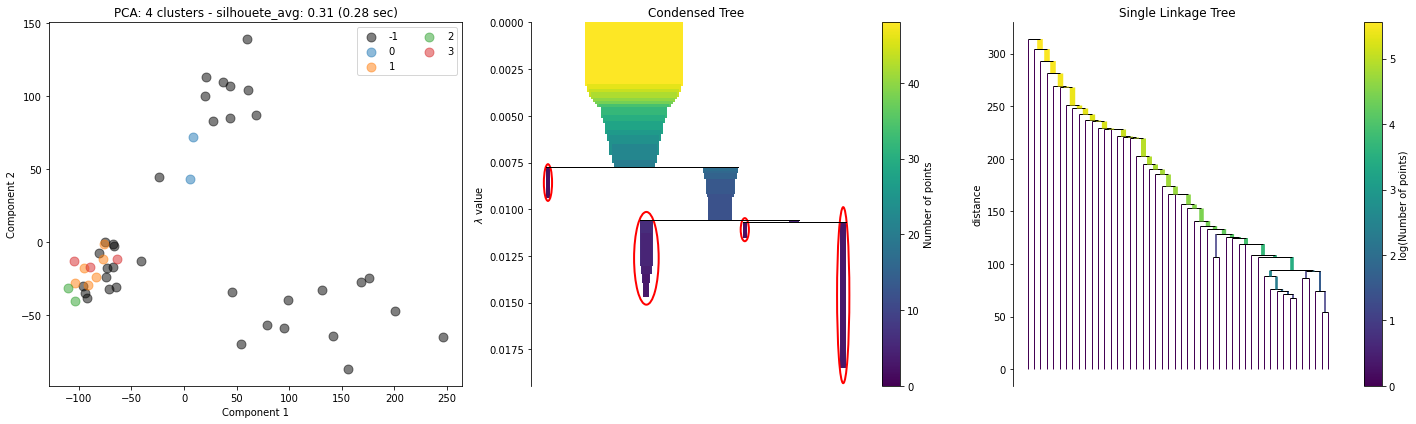

In [10]:
results = pd.DataFrame()
metrics_summary = []

for i, (label, method) in enumerate(methods.items()):
    print(i, label, method)
    # Performing the embedding algorithm:
    t0 = time()
    x_embedded = method.fit_transform(x_array_prep)
    t1 = time()

    model = HDBSCAN(min_cluster_size=2, min_samples=1)
    model.fit(x_embedded)
    cluster_labels = model.labels_
    results[label] = cluster_labels

    sample_silhouette_values = silhouette_samples(x_embedded, cluster_labels)
    silhouette_avg = sample_silhouette_values[np.where(cluster_labels >= 0)[0]].mean()
    
    n_clusters = len(np.unique(cluster_labels))-1
    method_metrics = {'silhouette_avg': silhouette_avg, 'n_clusters': n_clusters,
                      'n_outliers': sum(cluster_labels == -1)}
    metrics_summary.append(method_metrics)
    
    fig = plt.figure(figsize=(20, 6))
    # Plot 1:
    ax = fig.add_subplot(1, 3, 1)
    ax.set_title("%s: %d clusters - silhouete_avg: %.2g (%.2g sec)" % (label, n_clusters, silhouette_avg, t1 - t0))
    for k in np.unique(cluster_labels):
        indexes = np.where(cluster_labels == k)[0]
        if k == -1:
            plt.scatter(x_embedded[indexes, 0], x_embedded[indexes, 1], alpha=0.5, s=80, label=k, c='k')
        else:
            plt.scatter(x_embedded[indexes, 0], x_embedded[indexes, 1], alpha=0.5, s=80, label=k)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(ncol=2)
    # Plot 2:
    ax = fig.add_subplot(1, 3, 2)
    plt.title('Condensed Tree')
    model.condensed_tree_.plot(select_clusters=True)
    
    # Plot 3:
    ax = fig.add_subplot(1, 3, 3)
    plt.title('Single Linkage Tree')
    model.single_linkage_tree_.plot()
        
    plt.tight_layout()
    plt.savefig(f'../imgs/imgs_v2/img_0{i+1}_{label}_plots.png', dpi=100)
    plt.show()

In [14]:
metrics_summary = pd.DataFrame(metrics_summary, index=results.columns)
metrics_summary

,silhouette_avg,n_clusters,n_outliers
PCA,0.311719,4,35


In [15]:
# Presenting all elements of all groups by all methods:
all_groups = {}

for method in results.columns:
    print('\n'+method+':')
    all_groups[method] = {}

    method_results = results[method].values
    for val in np.unique(method_results):
        print(val, results.index[np.where(method_results == val)[0]].values)
        all_groups[method][val] = list(results.index[np.where(method_results == val)[0]])


PCA:
-1 ['H223' 'H224' 'H225' 'H226' 'H227' 'H228' 'H229' 'H230' 'H231' 'H234'
 'H237' 'H238' 'H242' 'H243' 'H244' 'H245' 'H246' 'H247' 'H248' 'H249'
 'H250' 'H251' 'H252' 'H253' 'H254' 'H255' 'H256' 'H257' 'H258' 'H259'
 'H260' 'H261' 'H262' 'H266' 'H270']
0 ['H235' 'H236']
1 ['H239' 'H240' 'H241' 'H263' 'H264' 'H265']
2 ['H232' 'H233']
3 ['H267' 'H268' 'H269']


In [16]:
all_clusters = []
all_relations = {}

# Concatenating the results of all methods:
for subject in results.index:
    related_subjects = []
    g_indexes = results.loc[subject, :].values
    n_out = len(np.where(g_indexes == -1)[0])
    if n_out < len(g_indexes)/2:
        all_partners = []
        for method, idx in zip(results.columns, g_indexes):
            if idx != -1:
                all_partners += all_groups[method][idx]
        all_partners = np.array(all_partners)
        all_partners = all_partners[~(all_partners == subject)]
        unique, counts = np.unique(all_partners, return_counts=True)
        for val, c in zip(unique, counts):
            if c > len(g_indexes)/2:
                related_subjects.append(val)
    
    new_cluster = set(related_subjects + [subject])
    if related_subjects and new_cluster not in all_clusters:
        all_clusters.append(new_cluster)
    all_relations[subject] = related_subjects
        
    print('Subject:', subject, 'related subjects:', related_subjects)

Subject: H223 related subjects: []
Subject: H224 related subjects: []
Subject: H225 related subjects: []
Subject: H226 related subjects: []
Subject: H227 related subjects: []
Subject: H228 related subjects: []
Subject: H229 related subjects: []
Subject: H230 related subjects: []
Subject: H231 related subjects: []
Subject: H232 related subjects: ['H233']
Subject: H233 related subjects: ['H232']
Subject: H234 related subjects: []
Subject: H235 related subjects: ['H236']
Subject: H236 related subjects: ['H235']
Subject: H237 related subjects: []
Subject: H238 related subjects: []
Subject: H239 related subjects: ['H240', 'H241', 'H263', 'H264', 'H265']
Subject: H240 related subjects: ['H239', 'H241', 'H263', 'H264', 'H265']
Subject: H241 related subjects: ['H239', 'H240', 'H263', 'H264', 'H265']
Subject: H242 related subjects: []
Subject: H243 related subjects: []
Subject: H244 related subjects: []
Subject: H245 related subjects: []
Subject: H246 related subjects: []
Subject: H247 related 

In [17]:
related_subjects = {'subject': [], 'related subjects': []}
for key, val in all_relations.items():
    related_subjects['subject'].append(key)
    related_subjects['related subjects'].append(val)
related_subjects = pd.DataFrame(related_subjects)
related_subjects.to_csv('related_subjects.csv')
related_subjects

,subject,related subjects
0,H223,[]
1,H224,[]
2,H225,[]
3,H226,[]
4,H227,[]
5,H228,[]
6,H229,[]
7,H230,[]
8,H231,[]
9,H232,[H233]


In [18]:
for i, cluster in enumerate(all_clusters):
    print(i+1, cluster)

1 {'H233', 'H232'}
2 {'H236', 'H235'}
3 {'H265', 'H263', 'H264', 'H240', 'H241', 'H239'}
4 {'H269', 'H267', 'H268'}


In [19]:
cluster_tags = []
for subject in results.index:
    tag = -1
    for k, cluster in enumerate(all_clusters):
        if subject in cluster:
            tag = k
            break
    cluster_tags.append(tag)


In [20]:
data['cluster_tag'] = cluster_tags
data

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922,cluster_tag
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,0,0,0,0,0,0,0,0,-1
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,0,0,0,0,0,0,0,-1
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,0,0,0,0,0,0,0,-1
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,0,0,0,0,0,0,0,-1
H227,0,0,491,186,30,11929,14,136,745,730,...,0,0,0,0,0,0,0,0,0,-1
H228,0,0,449,148,17,6856,16,227,3770,663,...,0,0,0,0,0,0,0,0,0,-1
H229,0,0,466,169,45,6756,15,217,1260,669,...,0,0,0,0,0,0,0,0,0,-1
H230,0,0,727,258,100,7668,4,905,1480,883,...,0,0,0,0,0,0,0,0,0,-1
H231,1,0,774,145,33,9315,1,94,75,873,...,0,0,0,0,0,0,0,0,0,-1
H232,0,0,576,131,8,3319,7,88,288,678,...,0,0,0,0,0,0,0,0,0,0


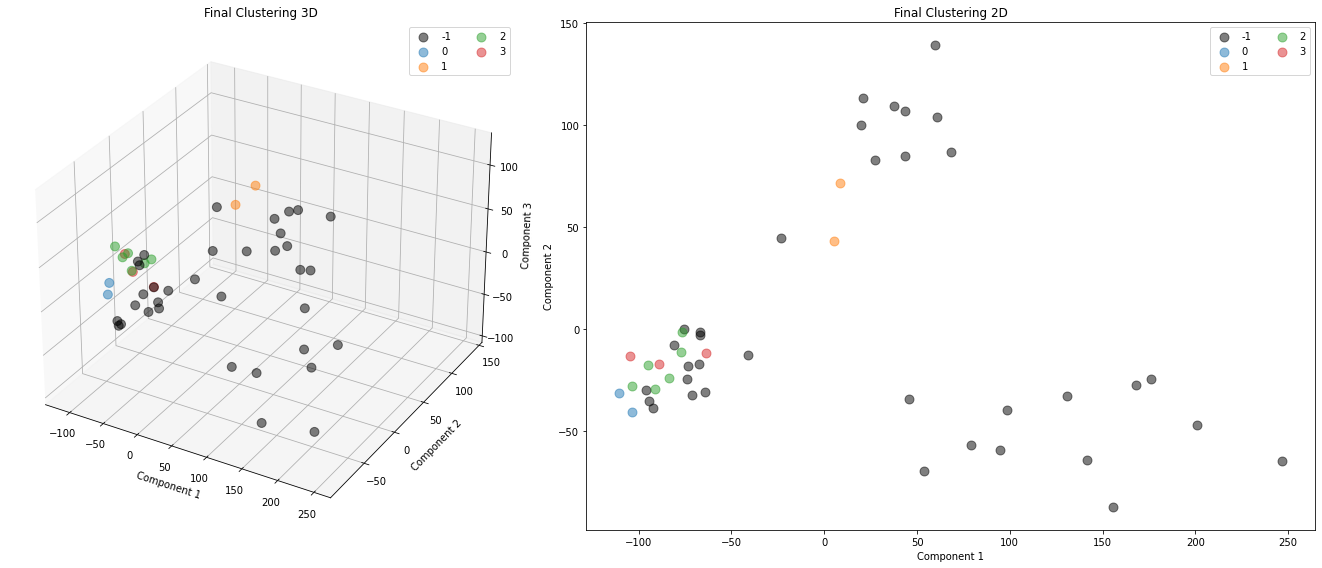

In [21]:
x_pca = PCA(n_components=n_components).fit_transform(x_array_prep)

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121, projection='3d')
plt.title('Final Clustering 3D')
for k in np.unique(cluster_tags):
    indexes = np.where(cluster_tags == k)[0]
    if k == -1:
        ax.scatter(x_pca[indexes, 0], x_pca[indexes, 1], x_pca[indexes, 2], alpha=0.5, s=80, label=k, c='k')
    else:
        ax.scatter(x_pca[indexes, 0], x_pca[indexes, 1], x_pca[indexes, 2], alpha=0.5, s=80, label=k)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend(ncol=2)
plt.tight_layout()

ax = fig.add_subplot(122)
plt.title('Final Clustering 2D')
for k in np.unique(cluster_tags):
    indexes = np.where(cluster_tags == k)[0]
    if k == -1:
        plt.scatter(x_pca[indexes, 0], x_pca[indexes, 1], alpha=0.5, s=80, label=k, c='k')
    else:
        plt.scatter(x_pca[indexes, 0], x_pca[indexes, 1], alpha=0.5, s=80, label=k)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.legend(ncol=2)
plt.tight_layout()

plt.show()